Instalación en bash: keras, keras (core), tenserflow, layers, pydot

### Librerias

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualizar graficas

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler #estandarizar los datos
from sklearn.model_selection import train_test_split #dividir para entrenamiento y prueba

from keras.models import Sequential #capas
from keras.utils import plot_model #visualizar arquitectura (la info de summary)
from keras.layers import Dense #capas densamente conectadas

### Datos
COLUMNAS: Largo del sepalo / Ancho del sepalo / Largo del petalo / Ancho del petalo /Especie

In [83]:
#cargar los datos desde el archivo iris.data
data = pd.read_csv(r"iris.csv", header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [84]:
data.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [85]:
#separar datos de las etiquetas
training_data = data.drop([4], axis=1) #solo columnas  0,1,2,3
target_data = data.drop([0,1,2,3], axis=1) #solo la columna 4 (la etiqueta)
print("Tamaño del dataset", data.shape)
print("Columnas de datos:", training_data.shape[1])
print("Columna de etiquetas:", target_data.shape[1])
#training_data.head()
#target_data.head()

Tamaño del dataset (150, 5)
Columnas de datos: 4
Columna de etiquetas: 1


In [86]:
#normalizamos los datos
scaler=StandardScaler()
scaler.fit(training_data) # calculo la media para poder hacer la transformacion
training_data=scaler.transform(training_data)# Ahora si, escalo los datos y los normalizo
print(training_data)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [87]:
#convertir etiquetas de texto a vect binarios
binarizer = LabelBinarizer()
target_data = binarizer.fit_transform(target_data)
print(target_data)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [88]:
#separar los datos: 70% entrenar, 30% prueba
validation_size = 0.30
seed = 42
X_train, X_test, y_train, y_test = train_test_split(training_data, target_data, 
                                                    test_size=validation_size, 
                                                    random_state=seed)
print("Tamaño del dataset", data.shape)
print("Tamaño de entrenamiento-par", X_train.shape)
print("Tamaño de entrenamiento-res", y_train.shape)
print("Tamaño de prueba-par", X_test.shape)
print("Tamaño de prueba-res", y_test.shape)

Tamaño del dataset (150, 5)
Tamaño de entrenamiento-par (105, 4)
Tamaño de entrenamiento-res (105, 3)
Tamaño de prueba-par (45, 4)
Tamaño de prueba-res (45, 3)


### Modelo

3 neuronas = setosa, versicolor, virginica <br>
4 var = largo y ancho del sepalo y el petalo <br>

In [135]:
#crear el modelo
model=Sequential()
model.add(Dense(3, input_dim = 4, activation = 'tanh')) #input 4dim y capa #1 (oculta/hidden) de 3 neuronas
model.add(Dense(4, activation='tanh')) #capa #2 (oculta/hidden) de 2 neuronas
model.add(Dense(3, activation='softmax')) #output de 1 neurona (0,1)
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

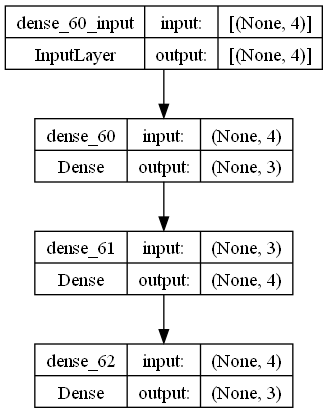

In [136]:
#Muestra la visualización
plot_model(model, show_shapes=True, show_layer_names=True)

In [137]:
#entrenar el modelo
# 105 / 32 = 4
#history=model.fit(X_train, y_train, epochs = 2000, batch_size = 32 (default), validation_data = (X_test, y_test), verbose = 1)
history = model.fit(X_train, y_train, epochs = 1500) 

Epoch 1/1500
4/4 [==============================] - 1s 6ms/step - loss: 0.2480 - accuracy: 0.3429
Epoch 2/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.2447 - accuracy: 0.3619
Epoch 3/1500
4/4 [==============================] - 0s 4ms/step - loss: 0.2415 - accuracy: 0.3619
Epoch 4/1500
4/4 [==============================] - 0s 6ms/step - loss: 0.2384 - accuracy: 0.3810
Epoch 5/1500
4/4 [==============================] - 0s 4ms/step - loss: 0.2354 - accuracy: 0.3905
Epoch 6/1500
4/4 [==============================] - 0s 2ms/step - loss: 0.2325 - accuracy: 0.4000
Epoch 7/1500
4/4 [==============================] - 0s 1ms/step - loss: 0.2297 - accuracy: 0.4286
Epoch 8/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.2271 - accuracy: 0.4476
Epoch 9/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.2245 - accuracy: 0.4476
Epoch 10/1500
4/4 [==============================] - 0s 5ms/step - loss: 0.2221 - accuracy: 0.4667
Epoch 11/1500
4/4 [

In [138]:
#evaluar el modelo
scores = model.evaluate(training_data, target_data)

5/5 [==============================] - 0s 4ms/step - loss: 0.0095 - accuracy: 0.9800


### Impresiones

In [139]:
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 98.00%


In [140]:
#prediccion a todo el dataset (sin la columna de la especie)
#comparar con el original
data_pred = model.predict(training_data).round()
print(data_pred)

5/5 [==============================] - 0s 4ms/step
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 

In [141]:
print(target_data)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [142]:
np.equal(data_pred, target_data)

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ T

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 3)                 15        
                                                                 
 dense_61 (Dense)            (None, 4)                 16        
                                                                 
 dense_62 (Dense)            (None, 3)                 15        
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


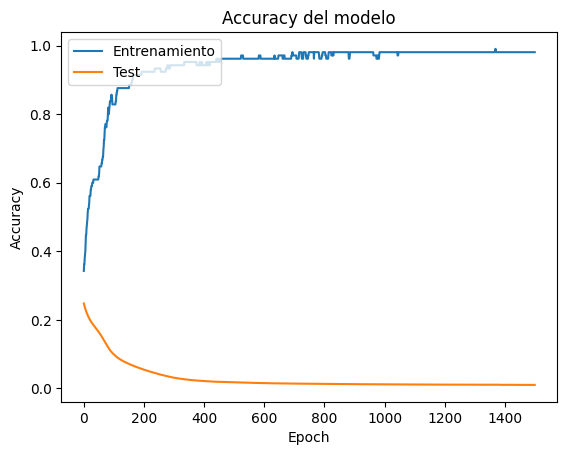

In [143]:
model.summary()
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()

### Conclusiones